In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.pipeline import Pipeline

In [4]:
iris = datasets.load_iris()

In [5]:
X = iris['data'][:, (2,3)] # petal length and width
y = (iris['target'] == 2).astype(np.float64) # Iris virginica

In [6]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
])

In [7]:
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [8]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [9]:
from sklearn.svm import SVC

In [10]:
svc_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', C=1)),
])
svc_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear'))])

In [11]:
from sklearn.linear_model import SGDClassifier

In [12]:
X.shape

(150, 2)

In [13]:
C = 1
m = X.shape[0]
sgd_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(loss='hinge', alpha=(1/(m*C)))),
])
sgd_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDClassifier(alpha=0.006666666666666667))])

## Nonlinear SVM classification

In [15]:
from sklearn.datasets import make_moons

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
X, y = make_moons(n_samples=100, noise=0.15)
X.shape

(100, 2)

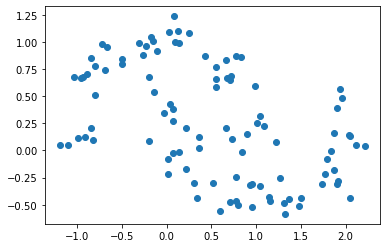

In [18]:
plt.scatter(X[:,0], X[:, 1])

In [19]:
y

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1])

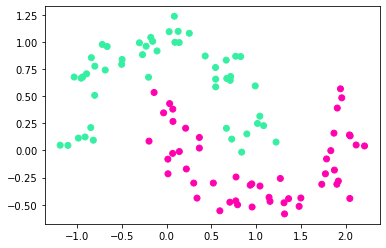

In [22]:
colors = np.array(['#37efa2', '#ff01af'])
plt.scatter(X[:,0], X[:, 1], color=colors[y])

In [23]:
poly_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge')),
])
poly_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

### Polynomial Kernel

In [24]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, C=5, coef0=1)),
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

### Gaussian RBF Kernel

In [25]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

## SVM Regression

In [26]:
from sklearn.svm import LinearSVR

In [27]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y) # need to apply StandardScaler before training

LinearSVR(epsilon=1.5)

In [28]:
from sklearn.svm import SVR

In [29]:
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y) # need to apply StandardScaler before training

SVR(C=100, degree=2, kernel='poly')